idea
phân loại ảnh dựa theo màu lệch, gồm non_cast
dùng k_mean để cluster các nhóm bị lệch màu, sau đó lấy ra A dùng 1 phương pháp nào đó (method2.py chẳng hạn) từ đó xác định range của A của mỗi nhóm.

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
from config import INPUT_IMAGE_FOLDER as input_folder, CLUSTERED_FOLDER as output_path

os.makedirs(output_path, exist_ok=True)

white_gray_folder = os.path.join(output_path, "white_gray")
os.makedirs(white_gray_folder, exist_ok=True)



In [3]:
filenames_for_cluster = []
features_for_cluster = []

from config import COLOR_CAST_THRESHOLD as d_threshold

def calc_mean_color(image):
    image_float = image.astype(np.float32) / 255.0
    return np.mean(image_float.reshape(-1, 3), axis=0)  # BGR

def delta_color(avg_color):
    B, G, R = avg_color
    max_c = max(R, G, B)
    min_c = min(R, G, B)
    delta = max_c - min_c
    return delta



In [4]:
# find non_cast - set as white_gray
for filename in tqdm(os.listdir(input_folder)):
    filepath = os.path.join(input_folder, filename)
    image = cv2.imread(filepath)
    if image is None:
        continue

    avg_color = calc_mean_color(image)
    d = delta_color(avg_color)
    if d < d_threshold:
        dst_path = os.path.join(white_gray_folder, filename)
        cv2.imwrite(dst_path, image)
    else:
        filenames_for_cluster.append(filename)
        features_for_cluster.append(avg_color)



100%|██████████| 5247/5247 [07:16<00:00, 12.03it/s]


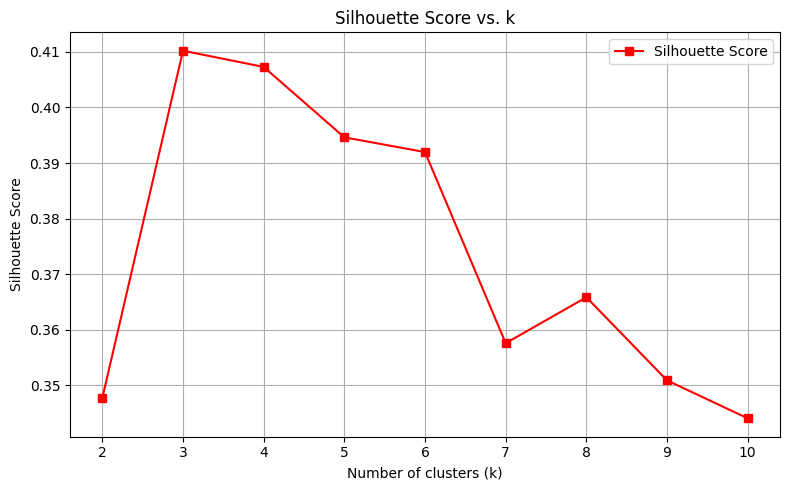

In [5]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_for_cluster)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_for_cluster, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='red', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
ádasdasdasádasdasdas cái này để ấn run all nó k chạy xunogos dưới :v

SyntaxError: invalid syntax (2938501283.py, line 1)

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(features_for_cluster)

for i in range(k):
    os.makedirs(os.path.join(output_path, f"cluster_{i}"), exist_ok=True)

for filename, label in zip(filenames_for_cluster, labels):
    src_path = os.path.join(input_folder, filename)
    dst_path = os.path.join(output_path, f"cluster_{label}", filename)
    image = cv2.imread(src_path)
    cv2.imwrite(dst_path, image)


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'
